# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


# Load Dataset

In [14]:
dataset_1 = '/content/Regina_data.csv'
dataset_2 = '/content/CPI_MONTHLY.csv'
dataset_3 = '/content/interest_rate.csv'

# Read the CSV file into a pandas DataFrame
data_frm_1 = pd.read_csv(dataset_1)
data_frm_2 = pd.read_csv(dataset_2)
data_frm_2 = data_frm_2.rename(columns={'date': 'Date'})
data_frm_3 = pd.read_csv(dataset_3)

# Sort the DataFrame based on the 'Date' column in ascending order
data_frm_1_sorted = data_frm_1.sort_values(by='Date')
data_frm_2_sorted = data_frm_2.sort_values(by='Date')
data_frm_3_sorted = data_frm_3.sort_values(by='Date')

# Sort Dataset

In [15]:
# Write the sorted DataFrame back to the same CSV file with a consistent date format
data_frm_1_sorted.to_csv('/content/Regina_data.csv', index=False)
data_frm_2_sorted.to_csv('/content/CPI_MONTHLY.csv', index=False)
data_frm_3_sorted.to_csv('/content/interest_rate.csv', index=False)

# Print the sorted DataFrame
print(data_frm_1_sorted)
print(data_frm_2_sorted)
print(data_frm_3_sorted)


           Date  Composite_HPI_SA  Single_Family_HPI_SA  One_Storey_HPI_SA  \
0    01-01-2005             100.0                 100.0              100.0   
12   01-01-2006             106.1                 106.1              105.9   
24   01-01-2007             119.5                 120.0              119.6   
36   01-01-2008             193.6                 193.7              197.8   
48   01-01-2009             190.8                 190.0              193.2   
..          ...               ...                   ...                ...   
167  01-12-2018             261.1                 271.1              263.6   
179  01-12-2019             252.5                 264.5              251.5   
191  01-12-2020             270.7                 283.5              268.6   
203  01-12-2021             287.3                 301.9              287.5   
215  01-12-2022             290.0                 305.1              287.1   

     Two_Storey_HPI_SA  Townhouse_HPI_SA  Apartment_HPI_SA  \
0

 Combine DataFrames based on 'Date' column

In [ ]:
merged_df = pd.merge(data_frm_1_sorted, data_frm_2_sorted, on='Date', how='outer')
merged_df = pd.merge(merged_df, data_frm_3_sorted, on='Date', how='outer')

# Replace NaN with 'null'
merged_df = merged_df.fillna('null')
merged_df.replace('null', np.nan, inplace=True)

# Print the merged DataFrame
print(merged_df)
merged_df.to_csv('/content/combine_Dataset.csv', index=False)
merged_sort= merged_df.sort_values(by='Date')
merged_sort.to_csv('/content/combine_Dataset_Sorted.csv', index=False)
merged_sort

           Date  Composite_HPI_SA  Single_Family_HPI_SA  One_Storey_HPI_SA  \
0    01-01-2005             100.0                 100.0              100.0   
1    01-01-2006             106.1                 106.1              105.9   
2    01-01-2007             119.5                 120.0              119.6   
3    01-01-2008             193.6                 193.7              197.8   
4    01-01-2009             190.8                 190.0              193.2   
..          ...               ...                   ...                ...   
345  01-12-2000               NaN                   NaN                NaN   
346  01-12-2001               NaN                   NaN                NaN   
347  01-12-2002               NaN                   NaN                NaN   
348  01-12-2003               NaN                   NaN                NaN   
349  01-12-2004               NaN                   NaN                NaN   

     Two_Storey_HPI_SA  Townhouse_HPI_SA  Apartment_HPI_SA  \
0

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW,Prime Rate,Target for the Overnight Rate
230,01-01-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.6,0.6,1.8,1.8,1.2,NaN,2.2,1.7,NaN,NaN
231,01-01-1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,1.6,1.5,1.5,1.3,NaN,1.6,1.4,NaN,NaN
232,01-01-1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,2.2,1.4,1.4,1.6,NaN,1.6,1.8,NaN,NaN
233,01-01-1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.1,1.1,1.1,1.1,1.4,NaN,1.1,1.3,NaN,NaN
234,01-01-1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.8,0.7,1.0,1.1,2.0,NaN,1.0,1.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,01-12-2018,261.1,271.1,263.6,260.3,208.6,196.2,287200.0,299000.0,264700.0,...,134.3,2.0,1.9,1.8,1.7,1.7,2.3,1.9,NaN,NaN
226,01-12-2019,252.5,264.5,251.5,260.4,198.1,173.1,277700.0,291700.0,252500.0,...,137.3,2.2,2.0,2.0,2.4,1.7,1.8,2.4,NaN,NaN
227,01-12-2020,270.7,283.5,268.6,278.8,207.0,185.5,297800.0,312700.0,269700.0,...,138.5,0.7,1.8,2.0,1.6,1.5,1.1,1.2,NaN,NaN
228,01-12-2021,287.3,301.9,287.5,292.6,212.3,196.1,316000.0,333000.0,288600.0,...,145.2,4.8,3.9,3.5,3.3,4.0,3.4,3.9,NaN,NaN


# Total Rows and Columns

In [ ]:
total_rows, total_columns = merged_sort.shape

print("Total Rows after combining the datasets:", total_rows)
print("Total Columns after combining the datasets:", total_columns)

Total Rows after combining the datasets: 350
Total Columns after combining the datasets: 24


Merge Dataset according to Date column

In [ ]:
merged_sort['Date'] = pd.to_datetime(merged_sort['Date'])

# Define the date range you want to eliminate
start_date = pd.to_datetime('01-01-1995')
end_date = pd.to_datetime('11-01-2007')

# Create a boolean cover to filter rows outside the specified date range
cover = (merged_sort['Date'] < start_date) | (merged_sort['Date'] > end_date)

# Apply the cover to eliminate rows within the specified date range
data_frm= merged_sort[cover]

data_frm.to_csv('/content/Dataset.csv', index=False)
print(data_frm)

          Date  Composite_HPI_SA  Single_Family_HPI_SA  One_Storey_HPI_SA  \
3   2008-01-01             193.6                 193.7              197.8   
4   2009-01-01             190.8                 190.0              193.2   
5   2010-01-01             212.5                 213.6              215.1   
6   2011-01-01             229.6                 231.8              234.7   
7   2012-01-01             256.6                 261.9              266.0   
..         ...               ...                   ...                ...   
225 2018-01-12             261.1                 271.1              263.6   
226 2019-01-12             252.5                 264.5              251.5   
227 2020-01-12             270.7                 283.5              268.6   
228 2021-01-12             287.3                 301.9              287.5   
229 2022-01-12             290.0                 305.1              287.1   

     Two_Storey_HPI_SA  Townhouse_HPI_SA  Apartment_HPI_SA  \
3            

Total Rows and Columns after removing Null values

In [ ]:
total_rows, total_columns = data_frm.shape

print("Total Rows after removing null values:", total_rows)
print("Total Columns:", total_columns)

Total Rows after removing null values: 194
Total Columns: 24


Count Null Values

In [ ]:
null_values_count = data_frm.isnull().sum()
data_frm
null_values_count

Date                               0
Composite_HPI_SA                   0
Single_Family_HPI_SA               0
One_Storey_HPI_SA                  0
Two_Storey_HPI_SA                  0
Townhouse_HPI_SA                   0
Apartment_HPI_SA                   0
Composite_Benchmark_SA             0
Single_Family_Benchmark_SA         0
One_Storey_Benchmark_SA            0
Two_Storey_Benchmark_SA            0
Townhouse_Benchmark_SA             0
Apartment_Benchmark_SA             0
V41690973                          1
V41690914                          1
STATIC_TOTALCPICHANGE              1
CPI_TRIM                           1
CPI_MEDIAN                         1
CPI_COMMON                         1
ATOM_V41693242                     1
STATIC_CPIXFET                     1
CPIW                               1
Prime Rate                       159
Target for the Overnight Rate    159
dtype: int64

# Interpolation

In [ ]:
# Interpolate NaN values using linear interpolation
data_frm.interpolate(method='pad', inplace=True)

# Print the DataFrame after interpolation
print(data_frm)
# Save the DataFrame with interpolated values to a new CSV file
data_frm.to_csv('last.csv', index=False)

          Date  Composite_HPI_SA  Single_Family_HPI_SA  One_Storey_HPI_SA  \
3   2008-01-01             193.6                 193.7              197.8   
4   2009-01-01             190.8                 190.0              193.2   
5   2010-01-01             212.5                 213.6              215.1   
6   2011-01-01             229.6                 231.8              234.7   
7   2012-01-01             256.6                 261.9              266.0   
..         ...               ...                   ...                ...   
225 2018-01-12             261.1                 271.1              263.6   
226 2019-01-12             252.5                 264.5              251.5   
227 2020-01-12             270.7                 283.5              268.6   
228 2021-01-12             287.3                 301.9              287.5   
229 2022-01-12             290.0                 305.1              287.1   

     Two_Storey_HPI_SA  Townhouse_HPI_SA  Apartment_HPI_SA  \
3            

<ipython-input-55-a73fa3b7d5c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frm.interpolate(method='pad', inplace=True)


# Data Correlation

---



<ipython-input-49-d30c39cc680b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_frm.corr()


                               Composite_HPI_SA  Single_Family_HPI_SA  \
Composite_HPI_SA                       1.000000              0.995725   
Single_Family_HPI_SA                   0.995725              1.000000   
One_Storey_HPI_SA                      0.987949              0.973713   
Two_Storey_HPI_SA                      0.978056              0.990615   
Townhouse_HPI_SA                       0.505015              0.427960   
Apartment_HPI_SA                       0.024444             -0.062079   
Composite_Benchmark_SA                 1.000000              0.995731   
Single_Family_Benchmark_SA             0.995729              1.000000   
One_Storey_Benchmark_SA                0.987955              0.973701   
Two_Storey_Benchmark_SA                0.978060              0.990613   
Townhouse_Benchmark_SA                 0.504938              0.427880   
Apartment_Benchmark_SA                 0.024351             -0.062168   
V41690973                              0.733824    

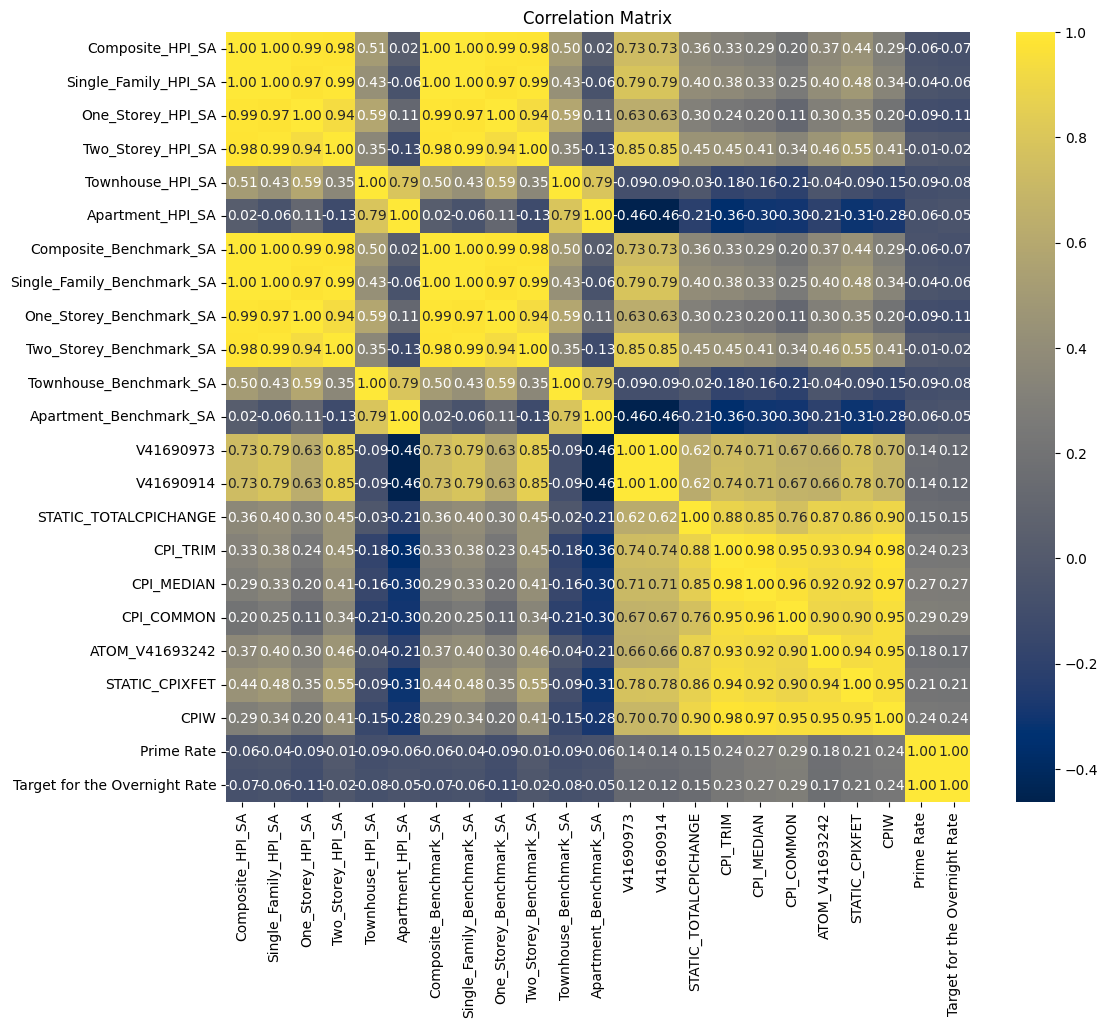

In [ ]:
correlation_matrix = data_frm.corr()

# Display the correlation matrix
print(correlation_matrix)

# heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Train Model

In [ ]:
# Load data
data = pd.read_csv("/content/last.csv")

# Extract features and target variable
X = data[['One_Storey_Benchmark_SA','Two_Storey_Benchmark_SA','Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA', 'V41690973', 'V41690914',
          'STATIC_TOTALCPICHANGE','CPI_TRIM', 'CPI_MEDIAN', 'CPI_COMMON', 'ATOM_V41693242', 'STATIC_CPIXFET', 'CPIW','Prime Rate','Target for the Overnight Rate']]
y = data['Single_Family_Benchmark_SA']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN-LSTM
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the CNN-LSTM model with two Conv1D layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MAE'])

# Set up callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=320, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Make predictions
predictions = best_model.predict(X_test)


Epoch 1/320
4/4 [==============================] - 3s 206ms/step - loss: 86354493440.0000 - MAE: 291882.2188 - val_loss: 86307684352.0000 - val_MAE: 291406.4062
Epoch 2/320
1/4 [======>.......................] - ETA: 0s - loss: 88939085824.0000 - MAE: 296693.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 42ms/step - loss: 86354468864.0000 - MAE: 291882.1875 - val_loss: 86307651584.0000 - val_MAE: 291406.3438
Epoch 3/320
4/4 [==============================] - 0s 96ms/step - loss: 86354427904.0000 - MAE: 291882.1250 - val_loss: 86307594240.0000 - val_MAE: 291406.2500
Epoch 4/320
4/4 [==============================] - 0s 110ms/step - loss: 86354378752.0000 - MAE: 291882.0312 - val_loss: 86307520512.0000 - val_MAE: 291406.1250
Epoch 5/320
4/4 [==============================] - 0s 86ms/step - loss: 86354288640.0000 - MAE: 291881.9062 - val_loss: 86307405824.0000 - val_MAE: 291405.9375
Epoch 6/320
4/4 [==============================] - 0s 23ms/step - loss: 86354157568.0000 - MAE: 291881.6875 - val_loss: 86307201024.0000 - val_MAE: 291405.6250
Epoch 7/320
4/4 [==============================] - 0s 33ms/step - loss: 86353903616.0000 - MAE: 291881.2500 - val_loss: 86306824192.0000 - val_MAE: 291404.9688
Epoch 8/320
4/4 [==============================] - 

# Model Evaluation

In [ ]:
loss, MAE = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error: {MAE}")
# Calculate the mean of actual values
mean_actual_values = np.mean(y_test)
# Calculate MAE percentage
MAE_percentage = (MAE / mean_actual_values) * 100
# Print the MAE percentage
print(f"Percentage of MAE : {MAE_percentage:.2f}%")

2/2 [==============================] - 0s 7ms/step - loss: 290142944.0000 - MAE: 14459.4277
Test Loss: 290142944.0
Mean Absolute Error: 14459.427734375
Percentage of MAE : 4.97%


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
# Calculate percentage error
mean_squared_true_values = np.mean(np.square(y_test))
percentage_error = (mse/ mean_squared_true_values) * 100
print(f"Percentage of MSE : {percentage_error: .2f}%")

Mean Squared Error: 291260102.93738735
Percentage of MSE :  0.34%


Plot the predicted and actual values

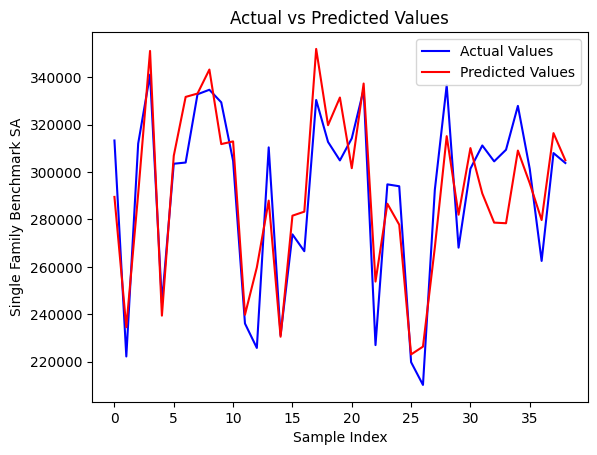

In [ ]:
# Plotting the actual values
plt.plot(y_test.values, label='Actual Values', color='blue')

# Plotting the predicted values
plt.plot(predictions, label='Predicted Values', color='red')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Single Family Benchmark SA')
plt.legend()
plt.show()

# Learning Curve

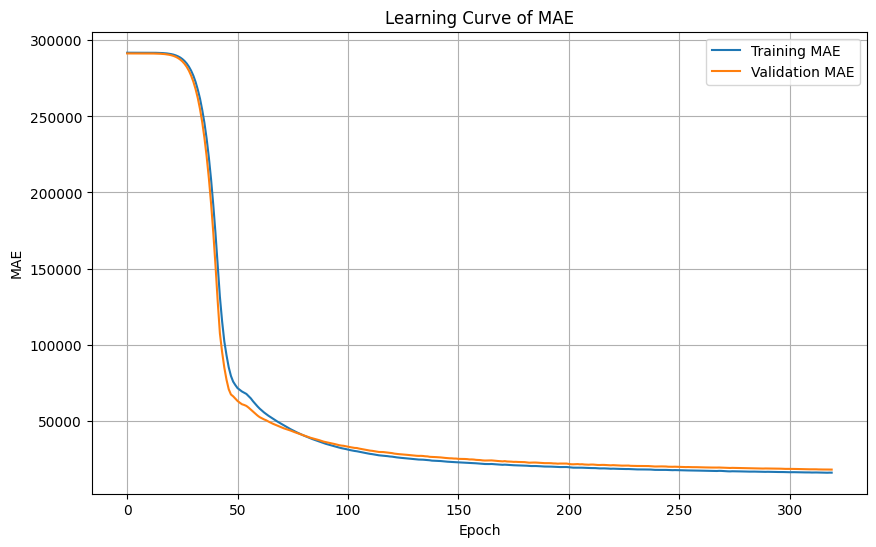

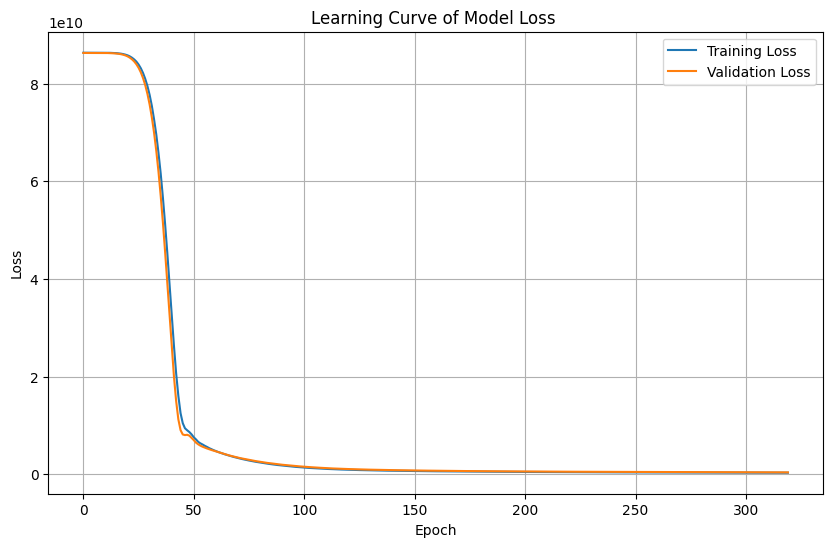

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))

    # Plot training & validation MAE values
    plt.plot(history.history['MAE'], label='Training MAE')
    plt.plot(history.history['val_MAE'], label='Validation MAE')

    plt.title('Learning Curve of MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Learning Curve of Model Loss ')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves
plot_learning_curve(history)

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/project_exam.ipynb


[NbConvertApp] Converting notebook /content/project_exam.ipynb to html
[NbConvertApp] Writing 1349751 bytes to /content/project_exam.html
